Make subplots of maps at a given depth in ASE for difference, warm, and cool composites. 
Plots warm composite T in colors and velocities for diff, warm and cool comps in vectors.

Retrieves the 5th year of data from the warmest runs and coolest runs as defined in Datasets.py.
Plots the mean during the 5th year for the warms, the cools, and the difference between the two. 

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors
import matplotlib.path as mpath
import Functions_load_output as flo
import Functions_data_analysis as fda
import Functions_plotting as fp
from Datasets import exp_set_dict_warm_order

In [2]:
# Use importlib to reload modules after editing them
import importlib
importlib.reload(fda)

<module 'Functions_data_analysis' from '/glade/campaign/univ/ulnl0002/Gemma/Analysis/Functions_data_analysis.py'>

In [3]:
# Set up parameters that will be the same for all analysis

# Select warm and cool runs
exp_set = 'ic_2001'
warm_runs = exp_set_dict_warm_order[exp_set][0:4]
cool_runs = exp_set_dict_warm_order[exp_set][4:8]
print('Warm runs',warm_runs)
print('Cool runs',cool_runs)

# region
region = 'AS_near'


Warm runs ['run_forc_erai_1982_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001', 'run_forc_erai_1989_rep_ic_2001', 'run_forc_erai_1992_rep_ic_2001']
Cool runs ['run_forc_erai_1994_rep_ic_2001', 'run_forc_erai_2003_rep_ic_2001', 'run_forc_erai_2009_rep_ic_2001', 'run_forc_erai_1991_rep_ic_2001']


In [45]:
# Get T, U and V data
importlib.reload(fda)

n_months = 12
# depth = -500 #negative
depth = 0

prefix = 'state_3d_set2'
# each list contains 5 items for each annual mean of data in years 1-5. each item is a list with 1 item.
diff_T_all_yrs = []
diff_U_all_yrs = []
diff_V_all_yrs = []
for i in range(5):
    month_start_idx = i*12
    print(i, month_start_idx)
    warm_T_list, cool_T_list, diff_T_list = fda.load_composite_data('T', [region], warm_runs, cool_runs, \
                                                          prefix, month_start_idx, n_months,depth=depth)
    diff_T_all_yrs.append(diff_T_list)
    warm_U_list, cool_U_list, diff_U_list = fda.load_composite_data('U', [region], warm_runs, cool_runs, \
                                                          prefix, month_start_idx, n_months,depth=depth)
    diff_U_all_yrs.append(diff_U_list)
    warm_V_list, cool_V_list, diff_V_list = fda.load_composite_data('V', [region], warm_runs, cool_runs, \
                                                          prefix, month_start_idx, n_months,depth=depth)
    diff_V_all_yrs.append(diff_V_list)


0 0
AS_near
Getting T data for all runs...
0
saving date from these times for 1st run:
 [cftime.DatetimeNoLeap(2001, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 4, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 5, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 7, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 8, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 9, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 10, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 11, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2001, 12, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2002, 1, 1, 0, 0, 0, 0, has_year_zero=True)]
(12, 249, 300)
1
(12, 249, 300)
2
(12, 249, 300)
3
(12, 249, 300)
Saving as xr data array...
Getting T d

In [46]:
land_ice_ds = flo.get_bathymetry_and_troughs()
lat1,lat2,lon1,lon2 = fda.plot_regions[region]
land_ice_ds = land_ice_ds.sel(lat=slice(lat1,lat2),lon=slice(lon1,lon2))
ice_lons,ice_lats = land_ice_ds.lon, land_ice_ds.lat


Fig saved: Plots/Figure_Sx_diff_map_Year 5, 0m depth.png


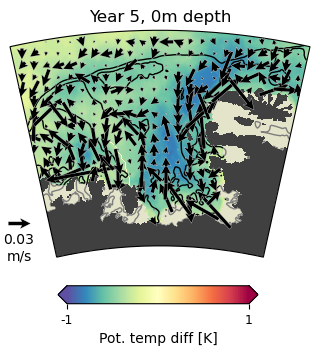

In [51]:
# Plot data

# select year to plot-----------------------
year = 5

Tmin,Tmax = -1,1
vec_len = 0.03


# plot------------------------------------------------

# select corresponding year of data
yr_idx = year -1
data_T = diff_T_all_yrs[yr_idx][0]
data_x = diff_U_all_yrs[yr_idx][0]#[0:-1,:]
data_y = diff_V_all_yrs[yr_idx][0]


if data_x.shape[0] > data_y.shape[0]:
    data_x = data_x[0:-1,:] 


fig = plt.figure()
fig.set_size_inches((4,4))

lat1,lat2,lon1,lon2 = fda.plot_regions[region]
lon_mid = (lon1+lon2)/2
grid_proj = ccrs.PlateCarree()
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo(central_longitude=lon_mid))

#mask large values where ice is 
cf_em = ax.pcolormesh(data_T.lon, data_T.lat, data_T,vmin=Tmin,vmax=Tmax,transform=grid_proj,cmap='Spectral_r', zorder=0)
q_lon,q_lat = data_x.lon.values, data_x.lat.values
#bigger scale = smaller arrows, bigger regrid = more points
quiv = ax.quiver(q_lon, q_lat, data_x, data_y, transform = grid_proj, pivot = 'middle',
                 regrid_shape=20, scale=0.4, width=0.012,headlength=3, headaxislength=2.5,
                 edgecolor='white', linewidth = 0.2,zorder=3,minlength=0.0005)
ax.quiverkey(quiv, X=0.03, Y=0.15, U=vec_len, label=str(vec_len)+'\nm/s', labelpos='S')

# Plot bathyemtry and ice and plot
land_ice_ds = land_ice_ds.sel(lat=slice(lat1,lat2),lon=slice(lon1,lon2))
lons,lats = land_ice_ds.lon, land_ice_ds.lat
blevs = (500,1000)
ax.contour(lons,lats,land_ice_ds.bathy,blevs,colors='k',transform=grid_proj,linewidths=1,zorder=1)
ax.contourf(lons,lats,land_ice_ds.all_ice,transform=grid_proj,colors=['lightgray']*2,alpha=0.6,zorder=2)
ax.contourf(lons,lats,land_ice_ds.grounded_ice,transform=grid_proj,cmap='binary_r',zorder=2)

if str(depth)[0] == '-':
    title = 'Year '+str(year)+', '+str(depth)[1:]+'m depth'
else:
    title = 'Year '+str(year)+', '+str(depth)+'m depth'
ax.set_title(title)

# Add colorbar
cb_ax = fig.add_axes([0.32,0.1,0.5,0.045])
cb_em = fig.colorbar(cf_em, cax=cb_ax, extend='both',orientation = 'horizontal')  
cb_em.set_label(label = 'Pot. temp diff [K]', fontsize=10)
cb_em.ax.tick_params(labelsize=9)
cb_em.set_ticks([Tmin,Tmax])
cb_em.set_ticklabels([Tmin,Tmax])

# Set shape of map to match shape of data rather than a rectangle
rect = mpath.Path([[lon1, lat2], [lon2, lat2],[lon2, lat1], [lon1, lat1], [lon1, lat2]]).interpolated(50)
proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)
ax.set_boundary(rect_in_target)
ax.set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
ax.set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())


fig.subplots_adjust(left=0.2,right=0.95,top=0.85,bottom=0.15,wspace=0.1,hspace=.05)
figname = 'Plots/Figure_Sx_diff_map_'+title+'.png'
plt.savefig(figname,dpi=400)
print('Fig saved:',figname)